# T: Programowanie zachłanne - problem wydawania reszty

1. **Problem wydawania reszty** czyli wybranie z danego zbioru monet o określonych nominałach w taki sposób, by uzyskać żądaną kwotę przy użyciu jak najmniejszej liczby monet. Implementacje rozwiązujące ten problem są wykorzystywane w praktyce w bankomatach i automatach sprzedających.

2. Wydawanie reszty metodą zachłanną - trzeba wydać określoną kwotę z użyciem dowolnej kombinacji monet, jednak w taki
sposób, aby posłużyć się minimalną ich liczbą:
- zaczynamy od monety (lub banknotu) o największym nominale, który nie przekracza wydawanej kwoty.
- w kolejnym kroku znów staramy się znaleźć najwyższy nominał,którego dodanie jeszcze nie spowoduje przekroczenia wypłacanej kwoty
- i tak aż do uzyskania odpowiedniej sumy.

3. Specyfikacja:<br>
**Dane:** Kwota reszty do wydania, nominały banknotów i monet uporządkowano malejąco<br>
**Wynik:** Liczba banknotów i monet o poszczególnych nominałach<br>

4. Lista kroków:<br>
**Krok 1.** Ustal wartości początkowe: kwotę do wydania oraz nominały banknotów i monet.<br>
**Krok 2.** Sprawdź, ile razy najwyższy nominał zmieści się w kwocie do wydania.<br>
**Krok 3.** Oblicz pozostałą do wydania kwotę.<br>
**Krok 4.** Przejdź do niższego nominału.<br>
**Krok 5.** Jeżeli reszta do wydania jest równa 0, to zakończ algorytm, w przeciwnym razie powtórz kroki 2. - 4.<br>

5. Schemat blokowy

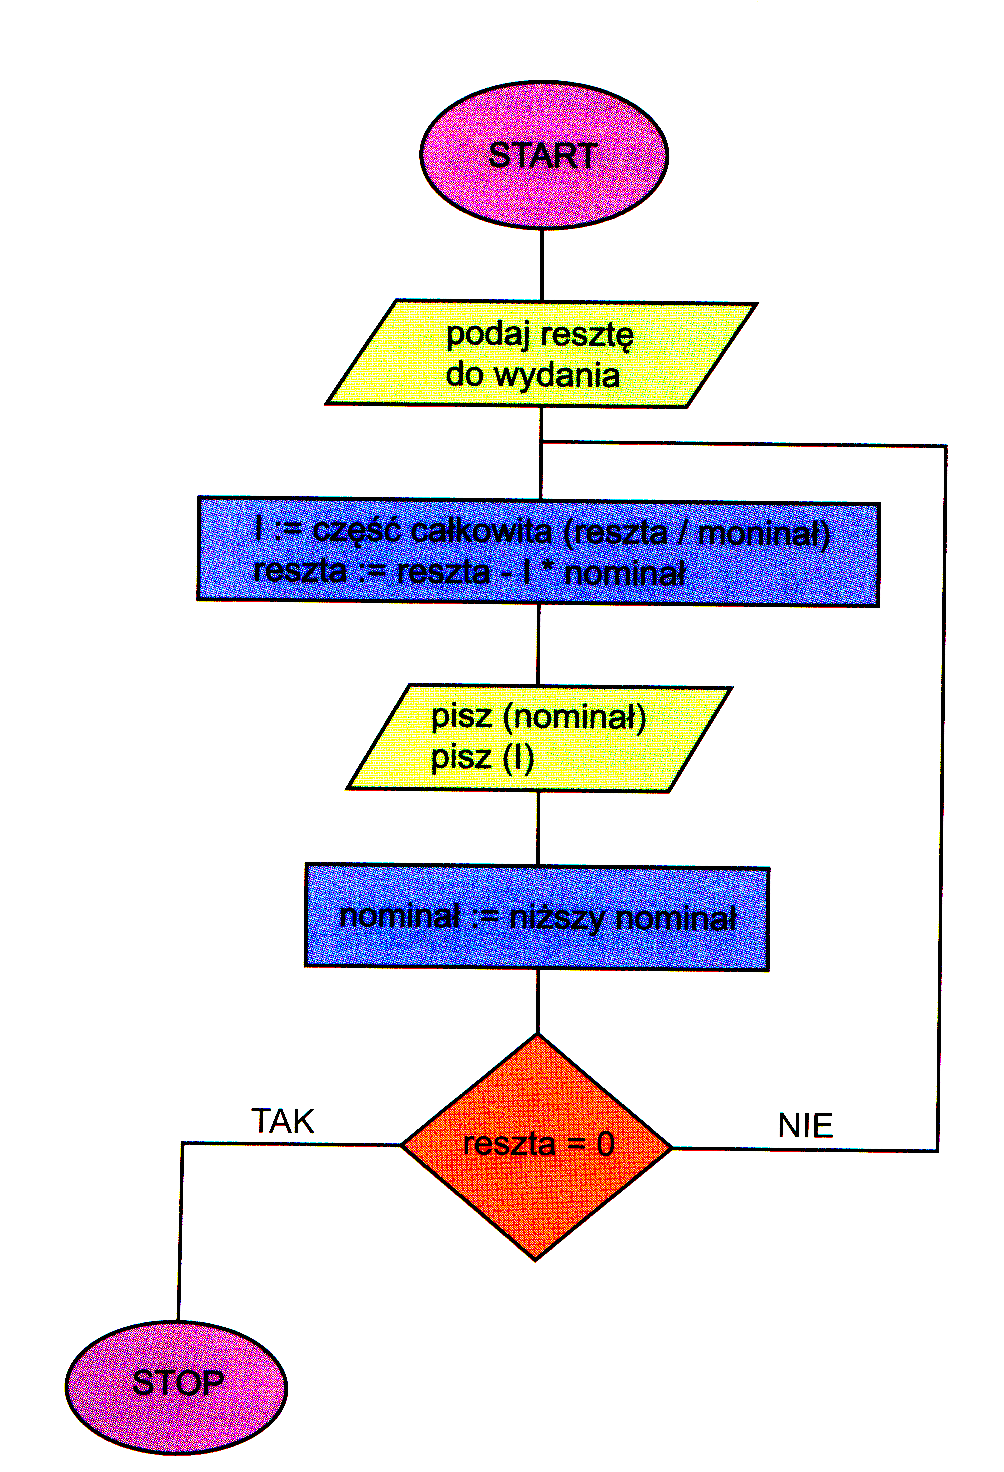

6. Zamiana napisu na liczbę i odwrotnie przy pomocy strumienia napisów:

In [ ]:
#include <iostream>
#include <sstream>
using namespace std;

int main ()
{
   long x, num;   // Zmienna do przechowania liczby
   string napis;   // Zmienna do przechowania napisu
   stringstream ss;  // Strumień do napisów

   cout << "Podaj dowolna liczbe calkowita: ";
   cin >> x;

   ss << x;   // Do strumienia 'wysyłamy' podaną liczbę
   napis = ss.str();   // Zamieniamy zawartość strumienia na napis

   cout << "Dlugosc napisu wynosi " << napis.size() << " znakow." << endl;
   ss.str("");// Czyszczenie strumienia z napisów
   ss << napis; // Przesyłamy  napis do strumienia
   ss >> num;  // Ze strumienia 'wysyłamy' liczbę

   cout << "Napis ma wartosc " << napis << endl;
   cout << "Wartosc calkowita napisu " << num << endl;

   return 0;
}

In [ ]:
%%writefile zamiana.cpp
#include <iostream>
#include <sstream>
using namespace std;

int main ()
{
   int x, num;   // Zmienna do przechowania liczby
   string napis;   // Zmienna do przechowania napisu
   stringstream ss;  // Strumień do napisów

   cout << "Podaj dowolna liczbe calkowita: ";
   cin >> x;

   ss << x;   // Do strumienia 'wysyłamy' podaną liczbę
   napis = ss.str();   // Zamieniamy zawartość strumienia na napis

   cout << "Dlugosc napisu wynosi " << napis.size() << " znakow." << endl;
   ss.str("");// Czyszczenie strumienia z napisów
   ss << napis; // Przesyłamy  napis do strumienia
   ss >> num;  // Ze strumienia 'wysyłamy' liczbę

   cout << "Napis ma wartosc " << napis << endl;
   cout << "Wartosc calkowita napisu " <<(int) num << endl;

   return 0;
}

Overwriting zamiana.cpp


In [ ]:
%%shell
g++ zamiana.cpp -o zamiana
./zamiana

Podaj dowolna liczbe calkowita: 12.5
Dlugosc napisu wynosi 4 znakow.
Napis ma wartosc 12.5
Wartosc calkowita napisu 12


7. Czytanie z pliku tekstowego:

In [ ]:
#include <iostream>
#include <fstream>
using namespace std;
int main(){
ifstream plik;
plik.open("liczby.txt");

int liczba,licznik=0;
string liczba_napis;
while(!plik.eof()){
    //plik>>liczba;
    getline(plik, liczba_napis,',');
    cout<<liczba_napis<<endl;
    licznik++;
}
plik.close();

plik.open("liczby.txt");
double * Tab;
int n_elementow=licznik;
Tab = new double[n_elementow];
int i=0;
while(!plik.eof()){
    plik>>Tab[i];
    i++;
}

delete[] Tab;
plik.close();
return 0;
}


In [ ]:
%%writefile liczby.txt
3.0,4.0,5.0,6.0,0.0,2.0,7.0,1.0

Writing liczby.txt


In [ ]:
ls -l


total 8
-rw-r--r-- 1 root root   32 Oct 12 10:15 liczby.txt
drwxr-xr-x 1 root root 4096 Oct  7 13:35 sample_data/


In [ ]:
%%writefile czytanie.cpp
#include <iostream>
#include <fstream>
#include <sstream>
using namespace std;
int main(){
ifstream plik;

plik.open("liczby.txt");

double liczba;
int licznik=0;
string liczba_napis;
while(!plik.eof()){
    getline(plik, liczba_napis,',');
    cout<<liczba_napis<<endl;
    licznik++;
}
plik.close();

plik.open("liczby.txt");
double *Tab;
int n_elementow=licznik;
Tab = new double[n_elementow];
int i=0;
while(!plik.eof()){
   getline(plik, liczba_napis,',');
   stringstream ss;
   ss << liczba_napis;
   ss >> Tab[i];
   i++;
}

for(int i=0;i<n_elementow;i++){
  cout<<Tab[i]<<endl;
}

delete[] Tab;
plik.close();
return 0;
}


Overwriting czytanie.cpp


In [ ]:
%%shell
g++ czytanie.cpp -o czytanie
./czytanie

3.0
4.0
5.0
6.0
0.0
2.0
7.0
1.0

3
6
4
8
5
10
6
12
0
0
2
4
7
14
1
2


8. Algorytm wydawania reszty - implementacja w C++:

In [ ]:
#include <iostream>
#include <math.h>
using namespace std;

main(){

//Deklaracja zmiennych i inicjalizacja zmiennych przechowujących wartości nominałów.
//Ważne: są posortowane od największego do najmniejszego

int nominaly[8] = {200, 100, 50, 20, 10, 5, 2, 1};
int reszta;
int wydaj; // Zmienna pomocnicza

cout << "Podaj resztę do wydania:" << endl;
cin >> reszta;

// Pętla (krok 5. z listy): jeśli cała reszta jest wydana, przerwij
while (reszta != 0){
    // Pętla (krok 4. z listy)
    for (int i = 0; i < 8; i++){
        // Sprawdzenie, czy nominał nie jest większy od pozostałej reszty do wydania — je
        // jest, pomijamy ten nominał
        if(reszta >= nominaly[i]){
            // Obliczenie, jaką kwotę reszty można wydać za pomocą bieżącego nominału —
            // zmienna wydaj zawiera liczbę nominałów, a nie sumę, którą one reprezentuj
            wydaj = floor(reszta / nominaly[i]);
            // Odjęcie od pozostałej reszty do wydania tego, co właśnie zostało wydane
            reszta -= wydaj * nominaly[i];
            cout << "Wydaj " << wydaj << " razy po nominale " <<  nominaly[i] << endl;
        }
    }
}

return 0;
}

In [ ]:
%%writefile zachlanne_reszta.cpp
#include <iostream>
#include <math.h>
using namespace std;

main(){

//Deklaracja zmiennych i inicjalizacja zmiennych przechowujących wartości nominałów.
//Ważne: są posortowane od największego do najmniejszego

int nominaly[8] = {200, 100, 50, 20, 10, 5, 2, 1};
int reszta;
int wydaj; // Zmienna pomocnicza

cout << "Podaj resztę do wydania:" << endl;
cin >> reszta;

// Pętla (krok 5. z listy): jeśli cała reszta jest wydana, przerwij
while (reszta != 0){
    // Pętla (krok 4. z listy)
    for (int i = 0; i < 8; i++){
        // Sprawdzenie, czy nominał nie jest większy od pozostałej reszty do wydania — je
        // jest, pomijamy ten nominał
        if(reszta >= nominaly[i]){
            // Obliczenie, jaką kwotę reszty można wydać za pomocą bieżącego nominału —
            // zmienna wydaj zawiera liczbę nominałów, a nie sumę, którą one reprezentuj
            wydaj = floor(reszta / nominaly[i]);
            // Odjęcie od pozostałej reszty do wydania tego, co właśnie zostało wydane
            reszta -= wydaj * nominaly[i];
            cout << "Wydaj " << wydaj << " razy po nominale " <<  nominaly[i] << endl;
        }
    }
}

return 0;
}

Writing zachlanne_reszta.cpp


In [ ]:
%%shell
g++ zachlanne_reszta.cpp -o zachlanne_reszta
./zachlanne_reszta

Podaj resztę do wydania:
123
Wydaj 1 razy po nominale 100
Wydaj 1 razy po nominale 20
Wydaj 1 razy po nominale 2
Wydaj 1 razy po nominale 1


9. Algorytm wydawania reszty - implementacja w Pythonie:

In [1]:
#wydawanie reszty - algorytm zachlanny
import math

nominaly = [200, 100, 50, 20, 10, 5, 2, 1];
def wydawanieReszty (resztaDoWydania, nominaly):
    n=len(nominaly)
    while (resztaDoWydania != 0):
        for i in range(n):
            if(resztaDoWydania >= nominaly[i]):
                wydaj=(math.floor(resztaDoWydania / nominaly[i]))
                resztaDoWydania -= wydaj * nominaly[i];
                print("Wydaj",wydaj," razy po nominale ",nominaly[i])

wydawanieReszty(123,nominaly)

Wydaj 1  razy po nominale  100
Wydaj 1  razy po nominale  20
Wydaj 1  razy po nominale  2
Wydaj 1  razy po nominale  1
